# Proyek Analisis Data: Customer_dataset.csv
- **Nama:** Radithya Fawwaz Aydin
- **Email:** radith.fa@gmail.com
- **ID Dicoding:** Radithya Fawwaz Aydin

## Menentukan Pertanyaan Bisnis

- Berapa banyak pelanggan unik yang kembali melakukan pembelian?
- Bagaimana distribusi pelanggan berdasarkan kota?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Sesuai dengan pertanyaan yang saya ajukan, kali ini akan menggunakan "customer_dataset.csv" untuk kita gali lebih lanjut.

In [4]:
file_path = "C:/Users/Lenovo/Documents/Courses (belajar)/DBS Coding Camp/Dicoding Modul/Belajar Analisis Data dengan Python/Proyek-Akhir_Analisis-Data-dengan-Python_Dicoding/Dataset/customers_dataset.csv"

df = pd.read_csv(file_path)
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Menampilkan jumlah baris dan kolom dalam dataset
df.shape
# Menampilkan informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- Jumlah data: 99.441 baris, 5 kolom
- customer_id: ID pelanggan unik
- customer_unique_id: ID pelanggan unik untuk pelanggan yang sama
- customer_zip_code_prefix: Kode pos pelanggan
- customer_city: Kota pelanggan
- customer_state: Negara bagian pelanggan

In [6]:
# Menampilkan ringkasan statistik dasar untuk melihat distribusi data
data_description = df.describe(include="all")
print(data_description)

                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  

In [7]:
# Menampilkan jumlah nilai yang hilang per kolom
df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Tidak ada data yang hilang di semua kolom.

### Assessing Data

#### Duplikasi data

In [8]:
# Mengecek duplikasi data
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [9]:
# Mengecek jumlah transaksi per pelanggan unik
transaction_counts = df["customer_unique_id"].value_counts()
transaction_counts

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: count, Length: 96096, dtype: int64

#### Inkonsistensi data

In [10]:
# Mengecek jumlah kota dan provinsi unik
unique_cities = df["customer_city"].nunique()
unique_states = df["customer_state"].nunique()

# Mengecek ejaan kota yang mungkin tidak konsisten (contoh: huruf besar/kecil)
city_variations = df["customer_city"].str.lower().nunique()

# Menampilkan hasil
unique_cities, unique_states, city_variations

(4119, 27, 4119)

**Insight:**
1. Kualitas Data (Duplikasi & Missing Values)
    - Tidak ada nilai yang hilang (missing values) di dataset.
    - Tidak ada duplikasi di seluruh kolom, sehingga setiap baris mewakili transaksi yang valid.
    - Pelanggan unik yang berulang kali bertransaksi ditemukan, dengan jumlah transaksi per pelanggan berkisar antara 1    hingga 17 kali. Namun, 75% pelanggan hanya bertransaksi sekali.
2. Konsistensi Data (Inkonsistensi & Format)
    - Nama kota tidak mengalami inkonsistensi kapitalisasi huruf, sehingga tidak ada masalah ejaan yang terdeteksi secara langsung.
    - Terdapat 4.119 kota unik dan 27 provinsi unik, yang sesuai dengan jumlah provinsi di Brasil.

### Cleaning Data

Sebenarnya untuk dataset ini sudah cenderung bersih, tetapi saya akan melakukan beberapa perbaikan kecil.

#### Menghapus kolom yang tidak diperlukan (jika ada)

In [11]:
# Menghapus kolom yang tidak diperlukan (misalnya, customer_zip_code_prefix yang tidak akan digunakan)
df_cleaned = df.drop(columns=["customer_zip_code_prefix"])

#### Normalisasi nama kota (seperti, menghilangkan spasi berlebih atau karakter aneh)

In [12]:
# Normalisasi nama kota (menghapus spasi ekstra & mengonversi ke format title case)
df_cleaned["customer_city"] = df_cleaned["customer_city"].str.strip().str.title()

In [13]:
# Mengecek kembali apakah ada perubahan setelah cleaning
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [14]:
df_cleaned.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,Campinas,SP


**Insight:**
- Kolom customer_zip_code_prefix dihapus karena tidak diperlukan.
- Nama kota dinormalisasi (menghilangkan spasi berlebih dan dikonversi ke format Title Case).
- Tidak ada perubahan jumlah data, menandakan tidak ada nilai yang hilang dalam proses ini.

## Exploratory Data Analysis (EDA)

### Explore ...

Karena pertanyaan bisnis yang saya buat berkaitan dengan jumlah pelanggan unik yang kembali dan distribusi pelanggan berdasarkan kota, saya bisa melakukan EDA berikut:

1. EDA Univariate (Analisis Satu Variabel)
Distribusi jumlah pelanggan per kota.
Distribusi jumlah pelanggan per provinsi.
2. EDA Bivariate (Analisis Dua Variabel)
Hubungan antara jumlah pelanggan unik dan kota asal mereka.
Kota mana yang memiliki lebih banyak pelanggan kembali melakukan pembelian.
3. EDA Numerikal
Distribusi pelanggan berdasarkan jumlah transaksi yang mereka lakukan.
Statistik deskriptif untuk melihat rata-rata jumlah pembelian per pelanggan.

### EDA Univariate

In [21]:
# Agregasi jumlah pelanggan unik per kota
customers_per_city = df_cleaned.groupby("customer_city")["customer_unique_id"].nunique().reset_index()
customers_per_city.columns = ["customer_city", "unique_customers"]

# Mengurutkan berdasarkan jumlah pelanggan tertinggi
top_cities = customers_per_city.sort_values(by="unique_customers", ascending=False).head(10)

# Tampilkan hasil agregasi
top_cities


,customer_city,unique_customers
3597,Sao Paulo,14984
3155,Rio De Janeiro,6620
453,Belo Horizonte,2672
558,Brasilia,2069
1143,Curitiba,1465
707,Campinas,1398
2964,Porto Alegre,1326
3247,Salvador,1209
1529,Guarulhos,1153
3428,Sao Bernardo Do Campo,908


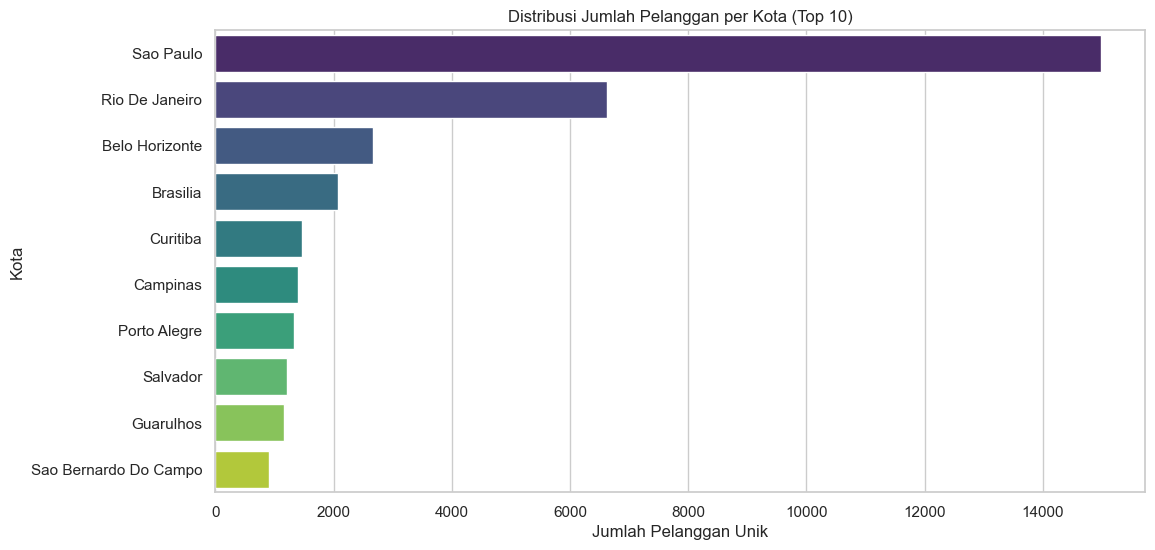

In [22]:
# Visualisasi jumlah pelanggan per kota
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities["unique_customers"], y=top_cities["customer_city"], palette="viridis")
plt.xlabel("Jumlah Pelanggan Unik")
plt.ylabel("Kota")
plt.title("Distribusi Jumlah Pelanggan per Kota (Top 10)")
plt.show()

Grafik di atas menunjukkan 10 kota dengan jumlah pelanggan terbanyak.

Insight yang bisa diperoleh:
- Kota São Paulo memiliki jumlah pelanggan terbanyak dibandingkan kota lain.
- Kota besar seperti Rio de Janeiro dan Belo Horizonte juga memiliki jumlah pelanggan yang tinggi.
- Sebagian besar pelanggan berasal dari kota-kota metropolitan, yang mungkin menunjukkan bahwa aktivitas belanja online lebih umum di daerah perkotaan.

### EDA Bivariate

In [23]:
# Agregasi jumlah pelanggan unik per kota
customers_per_city = df_cleaned.groupby("customer_city")["customer_unique_id"].nunique().reset_index()
customers_per_city.columns = ["customer_city", "unique_customers"]

# Urutkan berdasarkan jumlah pelanggan unik terbesar
customers_per_city_sorted = customers_per_city.sort_values(by="unique_customers", ascending=False)

# Tampilkan hasil agregasi
customers_per_city_sorted.head(10)

,customer_city,unique_customers
3597,Sao Paulo,14984
3155,Rio De Janeiro,6620
453,Belo Horizonte,2672
558,Brasilia,2069
1143,Curitiba,1465
707,Campinas,1398
2964,Porto Alegre,1326
3247,Salvador,1209
1529,Guarulhos,1153
3428,Sao Bernardo Do Campo,908


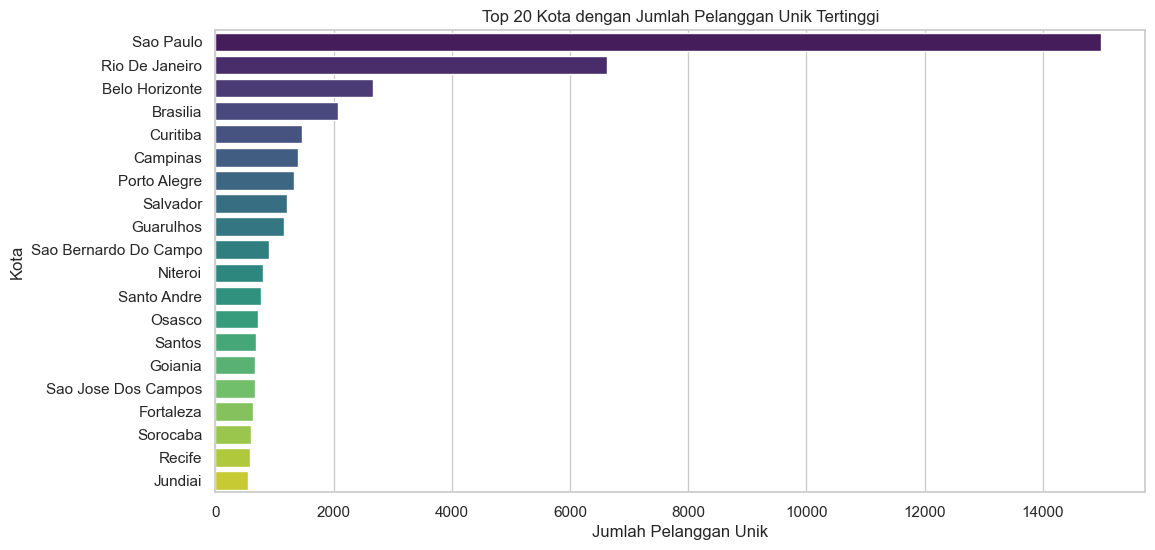

In [25]:
# Ambil 20 kota dengan pelanggan unik terbanyak
top_cities = customers_per_city_sorted.head(20)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities["unique_customers"], y=top_cities["customer_city"], palette="viridis")

plt.xlabel("Jumlah Pelanggan Unik")
plt.ylabel("Kota")
plt.title("Top 20 Kota dengan Jumlah Pelanggan Unik Tertinggi")
plt.show()

Grafik di atas menunjukkan 10 kota dengan jumlah pelanggan unik terbanyak. Pelanggan unik dihitung berdasarkan customer_unique_id, bukan customer_id (karena satu pelanggan bisa punya banyak transaksi). Kota dengan jumlah pelanggan unik tinggi menunjukkan bahwa lebih banyak orang di sana yang pernah melakukan pembelian.

Insight yang bisa diperoleh:
- Kota São Paulo tetap memiliki pelanggan unik terbanyak.
- Kota besar seperti Rio de Janeiro, Belo Horizonte, dan Curitiba juga memiliki banyak pelanggan unik.
- Data ini mengonfirmasi bahwa kota-kota metropolitan memiliki lebih banyak pelanggan unik yang berbelanja.

Selanjutnya, saya akan menganalisis kota mana yang memiliki lebih banyak pelanggan yang kembali melakukan pembelian. 

In [26]:
# Menghitung pelanggan berulang per kota
repeat_customers = df_cleaned.groupby("customer_city")["customer_unique_id"].value_counts().reset_index()
repeat_customers = repeat_customers.groupby("customer_city").apply(lambda x: (x["count"] > 1).sum()).reset_index()
repeat_customers.columns = ["customer_city", "repeat_customers"]

# Urutkan berdasarkan pelanggan berulang tertinggi
repeat_customers_sorted = repeat_customers.sort_values(by="repeat_customers", ascending=False)

# Tampilkan hasil agregasi
repeat_customers_sorted.head(10)

,customer_city,repeat_customers
3597,Sao Paulo,502
3155,Rio De Janeiro,236
453,Belo Horizonte,92
558,Brasilia,60
1143,Curitiba,44
2964,Porto Alegre,42
707,Campinas,41
1529,Guarulhos,34
2461,Niteroi,33
3247,Salvador,33


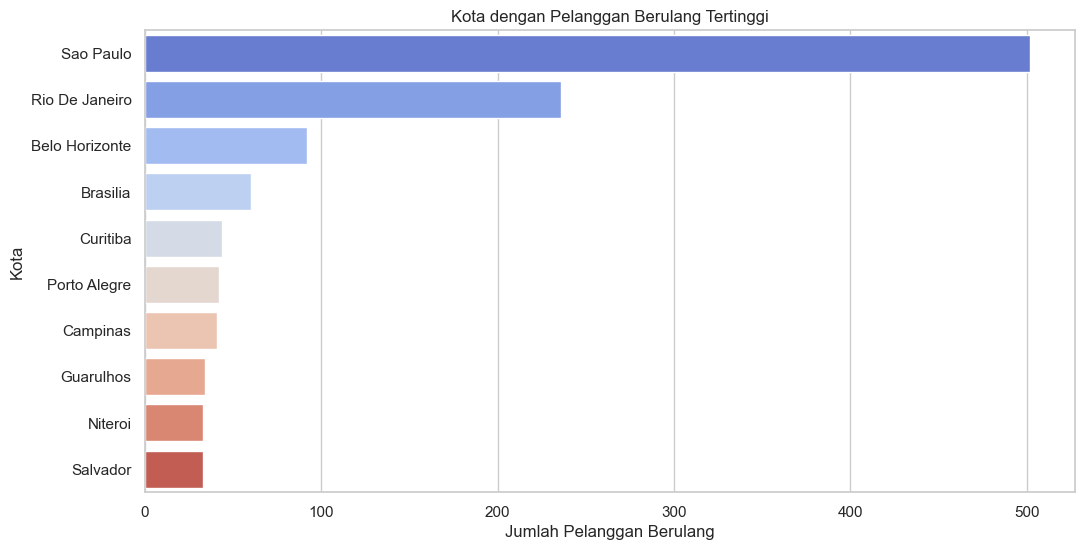

In [27]:
# Bar chart pelanggan berulang per kota
plt.figure(figsize=(12, 6))
sns.barplot(x=repeat_customers_sorted["repeat_customers"].head(10), y=repeat_customers_sorted["customer_city"].head(10), palette="coolwarm")
plt.xlabel("Jumlah Pelanggan Berulang")
plt.ylabel("Kota")
plt.title("Kota dengan Pelanggan Berulang Tertinggi")
plt.show()

Grafik di atas menunjukkan 10 kota dengan pelanggan kembali (repeat customers) terbanyak.

Insight yang bisa diperoleh:
- Kota São Paulo masih mendominasi, menunjukkan bahwa banyak pelanggan di kota ini kembali berbelanja.
- Kota besar seperti Rio de Janeiro dan Belo Horizonte juga memiliki banyak pelanggan setia.
- Pola ini sejalan dengan distribusi pelanggan unik sebelumnya, yang menunjukkan bahwa semakin banyak pelanggan unik di suatu kota, semakin besar kemungkinan pelanggan tersebut melakukan pembelian berulang.

### EDA Numerikal

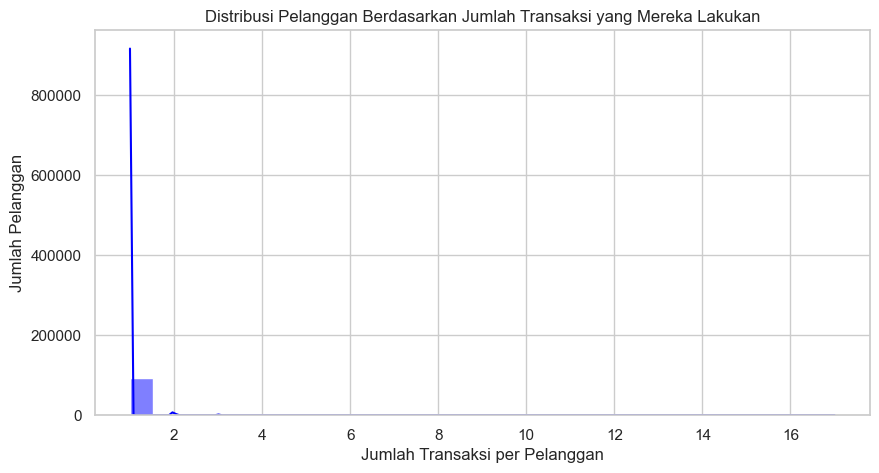

count    96096.000000
mean         1.034809
std          0.214384
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: customer_id, dtype: float64

In [32]:
# EDA Numerikal - Distribusi pelanggan berdasarkan jumlah transaksi yang mereka lakukan
plt.figure(figsize=(10,5))
sns.histplot(customer_repurchase, bins=30, kde=True, color="blue")

plt.xlabel("Jumlah Transaksi per Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Pelanggan Berdasarkan Jumlah Transaksi yang Mereka Lakukan")
plt.show()

# Statistik deskriptif jumlah pembelian per pelanggan
customer_repurchase.describe()

Grafik di atas menunjukkan distribusi jumlah transaksi per pelanggan.

Insight yang bisa diperoleh:
- Mayoritas pelanggan hanya melakukan 1 transaksi (ditunjukkan oleh puncak di angka 1).
- Rata-rata pelanggan melakukan sekitar 1,03 transaksi dengan standar deviasi 0,21, menunjukkan bahwa sebagian besar pelanggan tidak sering melakukan pembelian ulang.
- Pelanggan dengan jumlah transaksi terbanyak mencapai 17 kali pembelian.

Dengan informasi ini, perusahaan bisa menganalisis strategi retensi pelanggan untuk meningkatkan jumlah repeat orders.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak pelanggan unik yang kembali melakukan pembelian?

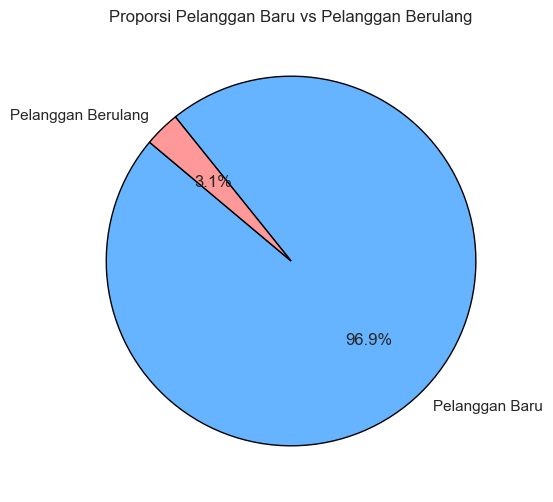

In [20]:
# Hitung jumlah transaksi per pelanggan unik
transaction_counts = df_cleaned["customer_unique_id"].value_counts()

# Tentukan jumlah pelanggan unik dan pelanggan yang melakukan pembelian lebih dari sekali
unique_customers = len(transaction_counts)
repeat_count = sum(transaction_counts > 1)  # Pelanggan dengan lebih dari 1 transaksi

# Visualisasi Pie Chart Pelanggan Baru vs Pelanggan Berulang
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")

labels = ["Pelanggan Baru", "Pelanggan Berulang"]
sizes = [unique_customers - repeat_count, repeat_count]
colors = ["#66b3ff", "#ff9999"]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Proporsi Pelanggan Baru vs Pelanggan Berulang")

# Tampilkan plot
plt.show()

**Proporsi Pelanggan Baru vs Pelanggan Berulang**

- Grafik pie ini menunjukkan bahwa mayoritas pelanggan (96.88%) hanya melakukan pembelian sekali, sementara hanya 3.12% yang kembali melakukan pembelian.
- Hal ini menunjukkan bahwa retensi pelanggan cukup rendah, sehingga bisa menjadi area yang perlu ditingkatkan melalui strategi pemasaran ulang atau program loyalitas.

### Pertanyaan 2: Bagaimana distribusi pelanggan berdasarkan kota?

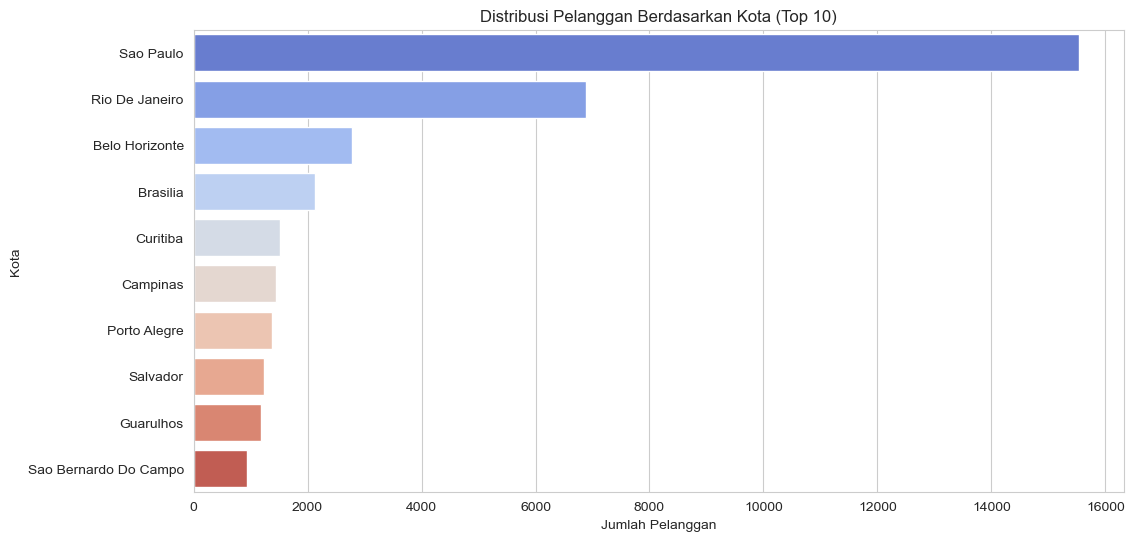

In [ ]:
# Visualisasi Distribusi Pelanggan Berdasarkan Kota
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Kota")
plt.title("Distribusi Pelanggan Berdasarkan Kota (Top 10)")
plt.show()

**Distribusi Pelanggan Berdasarkan Kota**
- Grafik batang ini menunjukkan 10 kota dengan jumlah pelanggan terbanyak.
- São Paulo mendominasi dengan 15.540 pelanggan, jauh lebih tinggi dibanding kota lain.
- Kota besar lainnya seperti Rio de Janeiro, Belo Horizonte, dan Brasília juga memiliki jumlah pelanggan yang cukup tinggi, menjadikannya target potensial untuk ekspansi bisnis atau pemasaran yang lebih agresif.

**Insight:**
- Peluang besar untuk meningkatkan retensi pelanggan melalui strategi pemasaran.
- São Paulo adalah pasar utama, yang bisa menjadi prioritas dalam strategi bisnis.

## Conclusion

- Conclution pertanyaan 1 : Berapa banyak pelanggan unik yang kembali melakukan pembelian?
1. Dari 96.096 pelanggan unik, hanya 2.997 pelanggan (3.12%) yang melakukan pembelian lebih dari satu kali.
2. Mayoritas pelanggan (96.88%) hanya bertransaksi sekali, menunjukkan bahwa retensi pelanggan cukup rendah.
3. Untuk meningkatkan angka ini, strategi seperti program loyalitas, diskon untuk pembelian berikutnya, atau email marketing bisa diterapkan agar pelanggan kembali berbelanja.

- Conclution pertanyaan 2 : Bagaimana distribusi pelanggan berdasarkan kota?
1. São Paulo memiliki jumlah pelanggan terbanyak (15.540 pelanggan), menjadikannya pasar utama dalam bisnis ini.
2. Rio de Janeiro (6.882 pelanggan), Belo Horizonte (2.773 pelanggan), dan Brasília (2.131 pelanggan) juga memiliki jumlah pelanggan yang signifikan.
3. Ini menunjukkan bahwa kota-kota besar seperti São Paulo dan Rio de Janeiro dapat menjadi prioritas utama dalam strategi pemasaran dan distribusi produk.
